In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline
from os.path import join
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers

In [ ]:
def sequence_to_onehot(_datax):
  res_list = []
  for i in range(len(_datax)):
    tmp =list()
    mapping = {"A":[1., 0., 0., 0.], "C": [0., 1., 0., 0.], "G": [0., 0., 1., 0.], "T":[0., 0., 0., 1.]}
    for j in _datax[i]:
      tmp.append(mapping[j]  if j in mapping.keys() else [0., 0., 0., 0.]) 
    res_list.append(np.array(tmp))
  res_np = np.array(res_list)
  return res_np

In [ ]:
# data shuffle
df_shuffled = pd.read_csv('data.csv').sample(frac=1).reset_index(drop=True)

# x, y 분류. numpy로 변환 후 1차원으로 reshape, sequence onehot encoding
datax = sequence_to_onehot(df_shuffled.iloc[:,[0,]].to_numpy().reshape(-1))
datay = df_shuffled.iloc[:,[2,]].to_numpy().reshape(-1)


In [ ]:
df_dummies = pd.get_dummies(df_shuffled, columns=['label'])

In [ ]:
df_shuffled.head(10)

,sequence,len,label
0,TCCTCCTCCTCTGCTCCTCCCGATCCCTCCTCCGCCGCCTGGTCCC...,5600,1
1,AGCGCCCGCCGCGGCCGAGGCGGCCGGAGTCCCGAGCTAGCCCCGG...,5600,1
2,AGCGCCCGACGCGGCCGAGGCGGCCGGAGTCCCGAGCTAGCCCCGG...,5600,0
3,AGCGCCCGACGCGGCCGAGGCGGCCGGAGTCCCGAGCTAGCCCCGG...,5600,0
4,AGCGCCCGCCGCGGCCGAGGCGGCCGGAGTCCCGAGCTAGCCCCGG...,5600,1
5,AGCGCCCGCCGCGGCCGAGGCGGCCGGAGTCCCGAGCTAGCCCCGG...,5600,1
6,AGCGCCCGACGCGGCCGAGGCGGCCGGAGTCCCGAGCTAGCCCCGG...,5600,0
7,TAGACGTCCGGGCAGCCCCCGGCGCAGCGCGGCCGCAGCAGCCTCC...,5600,1
8,AGCGCCCGACGCGGCCGAGGCGGCCGGAGTCCCGAGCTAGCCCCGG...,5600,0
9,AGCGCCCGACGCGGCCGAGGCGGCCCGAGTCCCGAGCTAGCCCCGG...,5600,0


In [ ]:
datay = df_dummies[['label_0', 'label_1']]
datay.head()

,label_0,label_1
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1


In [ ]:
print(datax.shape)

(242, 5600, 4)


In [ ]:
datax[0]

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [ ]:
# Train, Test Split 
trnx, tstx, trny, tsty = train_test_split(datax, datay, test_size = 0.3, random_state =111)

print(f"Train = {trnx.shape[0]}개, Test = {tstx.shape[0]}개")
print(f"trnx.shape = {trnx.shape}")
print(f"tstx.shape = {tstx.shape}")
print(f"trny.shape = {trny.shape}")
print(f"tsty.shape = {tsty.shape}")



Train = 169개, Test = 73개
trnx.shape = (169, 5600, 4)
tstx.shape = (73, 5600, 4)
trny.shape = (169,)
tsty.shape = (73,)


In [ ]:
input_shape = (5600,4,1)
cnn_model = models.Sequential()

cnn_model.add(layers.Conv2D(16,(2,2), padding='same', input_shape=input_shape))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.Activation("relu"))
cnn_model.add(layers.MaxPooling2D((2,1)))

cnn_model.add(layers.Conv2D(16,(2,2), padding='same'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.Activation("relu"))
cnn_model.add(layers.Dropout(0.2))
cnn_model.add(layers.MaxPooling2D((2,1)))

cnn_model.add(layers.Flatten())

cnn_model.add(layers.Dense(units = 100, activation = "relu"))
cnn_model.add(layers.Dense(units = 1, activation = "sigmoid"))


In [ ]:
opt = optimizers.SGD(lr=0.01)
cnn_model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics=['accuracy'])

cnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 5600, 4, 16)       80        
                                                                 
 batch_normalization_6 (Batc  (None, 5600, 4, 16)      64        
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 5600, 4, 16)       0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 2800, 4, 16)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 2800, 4, 16)       1040      
                                                                 
 batch_normalization_7 (Batc  (None, 2800, 4, 16)     

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Non-trainable params: 64
_________________________________________________________________


In [ ]:
histroy = cnn_model.fit(trnx.reshape(-1,5600,4,1), trny, validation_data = [tstx.reshape(-1,5600,4,1),tsty], batch_size=20, epochs = 100)

Epoch 1/100


KeyboardInterrupt: ignored

Exception ignored in: 'zmq.backend.cython.message.Frame.__dealloc__'
Traceback (most recent call last):
  File "zmq/backend/cython/checkrc.pxd", line 13, in zmq.backend.cython.checkrc._check_rc
KeyboardInterrupt


9/9 [==============================] - 57s 1s/step - loss: 16.4834 - accuracy: 0.6627 - val_loss: 8.8669 - val_accuracy: 0.4795
Epoch 2/100
9/9 [==============================] - 6s 686ms/step - loss: 29.2014 - accuracy: 0.7041 - val_loss: 10.7710 - val_accuracy: 0.4795
Epoch 3/100
9/9 [==============================] - 5s 550ms/step - loss: 36.2810 - accuracy: 0.6213 - val_loss: 2.4572 - val_accuracy: 0.4795
Epoch 4/100
9/9 [==============================] - 6s 622ms/step - loss: 19.9628 - accuracy: 0.7515 - val_loss: 10.1326 - val_accuracy: 0.4795
Epoch 5/100
9/9 [==============================] - 5s 544ms/step - loss: 7.5136 - accuracy: 0.7041 - val_loss: 9.4282 - val_accuracy: 0.4795
Epoch 6/100
9/9 [==============================] - 5s 544ms/step - loss: 7.0489 - accuracy: 0.7219 - val_loss: 10.5897 - val_accuracy: 0.4795
Epoch 7/100
9/9 [==============================] - 5s 540ms/step - loss: 0.5695 - accuracy: 0.8462 - val_loss: 10.8833 - val_accuracy: 0.4795
Epoch 8/100
9/9 [==

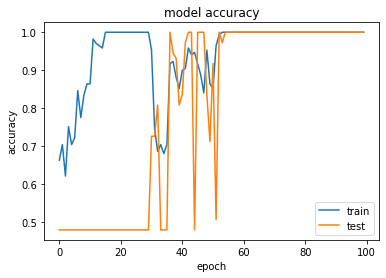

In [ ]:
# Model Performance (Measurement = Accuracy)
plt.plot(histroy.history['accuracy'])
plt.plot(histroy.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'lower right')
plt.show()


In [ ]:
from itertools import product

In [ ]:
k_mer = []

In [ ]:
for i in product(['A', 'T', 'G', 'C', 'D'],repeat=3):
    k_mer.append(''.join(i))
    print(i, end=" ")
print(k_mer)

('A', 'A', 'A') ('A', 'A', 'T') ('A', 'A', 'G') ('A', 'A', 'C') ('A', 'A', 'D') ('A', 'T', 'A') ('A', 'T', 'T') ('A', 'T', 'G') ('A', 'T', 'C') ('A', 'T', 'D') ('A', 'G', 'A') ('A', 'G', 'T') ('A', 'G', 'G') ('A', 'G', 'C') ('A', 'G', 'D') ('A', 'C', 'A') ('A', 'C', 'T') ('A', 'C', 'G') ('A', 'C', 'C') ('A', 'C', 'D') ('A', 'D', 'A') ('A', 'D', 'T') ('A', 'D', 'G') ('A', 'D', 'C') ('A', 'D', 'D') ('T', 'A', 'A') ('T', 'A', 'T') ('T', 'A', 'G') ('T', 'A', 'C') ('T', 'A', 'D') ('T', 'T', 'A') ('T', 'T', 'T') ('T', 'T', 'G') ('T', 'T', 'C') ('T', 'T', 'D') ('T', 'G', 'A') ('T', 'G', 'T') ('T', 'G', 'G') ('T', 'G', 'C') ('T', 'G', 'D') ('T', 'C', 'A') ('T', 'C', 'T') ('T', 'C', 'G') ('T', 'C', 'C') ('T', 'C', 'D') ('T', 'D', 'A') ('T', 'D', 'T') ('T', 'D', 'G') ('T', 'D', 'C') ('T', 'D', 'D') ('G', 'A', 'A') ('G', 'A', 'T') ('G', 'A', 'G') ('G', 'A', 'C') ('G', 'A', 'D') ('G', 'T', 'A') ('G', 'T', 'T') ('G', 'T', 'G') ('G', 'T', 'C') ('G', 'T', 'D') ('G', 'G', 'A') ('G', 'G', 'T') ('G', 'G

In [ ]:
for k in k_mer:
  print(k, end= " ")

AAA AAT AAG AAC AAD ATA ATT ATG ATC ATD AGA AGT AGG AGC AGD ACA ACT ACG ACC ACD ADA ADT ADG ADC ADD TAA TAT TAG TAC TAD TTA TTT TTG TTC TTD TGA TGT TGG TGC TGD TCA TCT TCG TCC TCD TDA TDT TDG TDC TDD GAA GAT GAG GAC GAD GTA GTT GTG GTC GTD GGA GGT GGG GGC GGD GCA GCT GCG GCC GCD GDA GDT GDG GDC GDD CAA CAT CAG CAC CAD CTA CTT CTG CTC CTD CGA CGT CGG CGC CGD CCA CCT CCG CCC CCD CDA CDT CDG CDC CDD DAA DAT DAG DAC DAD DTA DTT DTG DTC DTD DGA DGT DGG DGC DGD DCA DCT DCG DCC DCD DDA DDT DDG DDC DDD 

In [ ]:
k_mer = pd.DataFrame(k_mer)

In [ ]:
k_mer.head()

,0
0,AAA
1,AAT
2,AAG
3,AAC
4,AAD


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohencoder = OneHotEncoder()
ohencoder.fit(k_mer)
print(ohencoder.transform(k_mer).toarray())

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
ohencoder.categories_

[array(['AAA', 'AAC', 'AAD', 'AAG', 'AAT', 'ACA', 'ACC', 'ACD', 'ACG',
        'ACT', 'ADA', 'ADC', 'ADD', 'ADG', 'ADT', 'AGA', 'AGC', 'AGD',
        'AGG', 'AGT', 'ATA', 'ATC', 'ATD', 'ATG', 'ATT', 'CAA', 'CAC',
        'CAD', 'CAG', 'CAT', 'CCA', 'CCC', 'CCD', 'CCG', 'CCT', 'CDA',
        'CDC', 'CDD', 'CDG', 'CDT', 'CGA', 'CGC', 'CGD', 'CGG', 'CGT',
        'CTA', 'CTC', 'CTD', 'CTG', 'CTT', 'DAA', 'DAC', 'DAD', 'DAG',
        'DAT', 'DCA', 'DCC', 'DCD', 'DCG', 'DCT', 'DDA', 'DDC', 'DDD',
        'DDG', 'DDT', 'DGA', 'DGC', 'DGD', 'DGG', 'DGT', 'DTA', 'DTC',
        'DTD', 'DTG', 'DTT', 'GAA', 'GAC', 'GAD', 'GAG', 'GAT', 'GCA',
        'GCC', 'GCD', 'GCG', 'GCT', 'GDA', 'GDC', 'GDD', 'GDG', 'GDT',
        'GGA', 'GGC', 'GGD', 'GGG', 'GGT', 'GTA', 'GTC', 'GTD', 'GTG',
        'GTT', 'TAA', 'TAC', 'TAD', 'TAG', 'TAT', 'TCA', 'TCC', 'TCD',
        'TCG', 'TCT', 'TDA', 'TDC', 'TDD', 'TDG', 'TDT', 'TGA', 'TGC',
        'TGD', 'TGG', 'TGT', 'TTA', 'TTC', 'TTD', 'TTG', 'TTT'],
       dtype

In [ ]:
k_mer_oh = ohencoder.transform(k_mer).toarray()

In [ ]:
k_mer_dict = dict()
for i in range(125):
  k_mer_dict[k_mer[0][i]] = k_mer_oh[i]

In [ ]:
k_mer_dict['AAA']

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

In [ ]:
print(ohencoder.transform(k_mer))

  (0, 0)	1.0
  (1, 4)	1.0
  (2, 3)	1.0
  (3, 1)	1.0
  (4, 2)	1.0
  (5, 20)	1.0
  (6, 24)	1.0
  (7, 23)	1.0
  (8, 21)	1.0
  (9, 22)	1.0
  (10, 15)	1.0
  (11, 19)	1.0
  (12, 18)	1.0
  (13, 16)	1.0
  (14, 17)	1.0
  (15, 5)	1.0
  (16, 9)	1.0
  (17, 8)	1.0
  (18, 6)	1.0
  (19, 7)	1.0
  (20, 10)	1.0
  (21, 14)	1.0
  (22, 13)	1.0
  (23, 11)	1.0
  (24, 12)	1.0
  :	:
  (100, 50)	1.0
  (101, 54)	1.0
  (102, 53)	1.0
  (103, 51)	1.0
  (104, 52)	1.0
  (105, 70)	1.0
  (106, 74)	1.0
  (107, 73)	1.0
  (108, 71)	1.0
  (109, 72)	1.0
  (110, 65)	1.0
  (111, 69)	1.0
  (112, 68)	1.0
  (113, 66)	1.0
  (114, 67)	1.0
  (115, 55)	1.0
  (116, 59)	1.0
  (117, 58)	1.0
  (118, 56)	1.0
  (119, 57)	1.0
  (120, 60)	1.0
  (121, 64)	1.0
  (122, 63)	1.0
  (123, 61)	1.0
  (124, 62)	1.0


In [ ]:
print(ohencoder.transform(pd.DataFrame(['AAA', 'TTT'])).toarray())

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1.]]
